# Purchasing power of English workers from the 16th to the 19th century

Intro blabla



## Import data

First import the Wheat.csv file. 

In [1]:
import pandas as pd

data = pd.read_csv('Wheat.csv', header = 0, index_col = 0)
print(data.head(5), '\n...\n', data.tail(5))

   Year  Wheat  Wages
1  1565   41.0   5.00
2  1570   45.0   5.05
3  1575   42.0   5.08
4  1580   49.0   5.12
5  1585   41.5   5.15 
...
     Year  Wheat  Wages
49  1805   81.0   29.5
50  1810   99.0   30.0
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN


To pre-process the data, we can check whether there are any missing data points, and delete these for now. 

In [2]:
nulldata = pd.isnull(data)
data_raw = data

if any(nulldata):  
    data = data_raw.dropna()

print(data.tail(5))

    Year  Wheat  Wages
46  1790   47.5   25.5
47  1795   76.0   27.5
48  1800   79.0   28.5
49  1805   81.0   29.5
50  1810   99.0   30.0


Now all NaN points have been removed. 
<br><br>
However, this is unnecessary as panda and matplotlib can work with NaN. So, lets take the initial data.

In [3]:
data = data_raw

## Playfair's graph

William Playfair made multiple graphs from the data displayed above, one of which includes all the information in one graph. It looks like this: <br><br>
![William's graph](https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png)
<br>
Here this graph is reproduced. 
For this purpose we use the matplotlib package: 

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

Here is the plot:

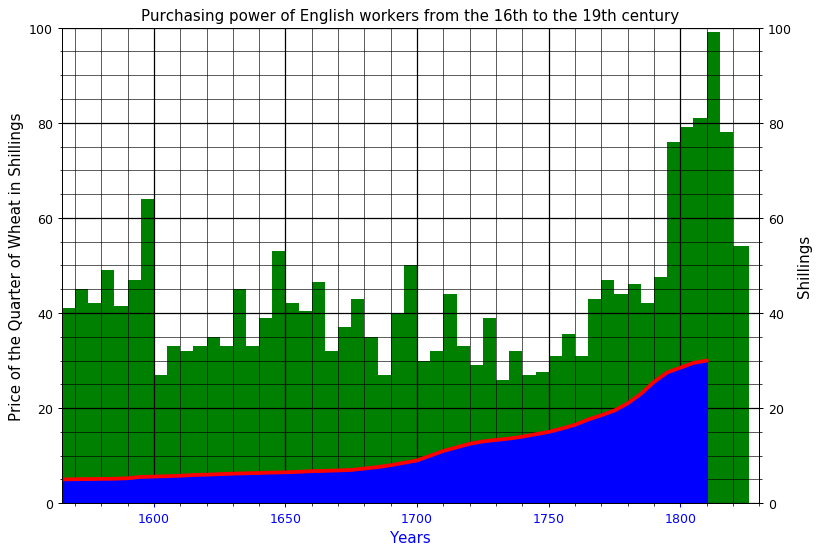

In [5]:
# define colors for graph
colors = ['r', 'b', 'g']

# initiate figure
plt.figure(num=None, figsize=(10, 7), dpi=90, facecolor='w', edgecolor='k')
ax1 = plt.subplot()

# bar graph
ax1.bar(data.Year, data.Wheat, width = 5, bottom = 0, color = colors[2], align = 'edge')

# set y axis params
ax1.set_ylim([0, 100])
ax1.minorticks_on()
ax1.tick_params(axis = 'y', direction = 'out', color = 'k')
ax1.set_ylabel("Price of the Quarter of Wheat in Shillings", fontsize = 12, color = 'k')

# add twin axis for line graph
ax2 = ax1.twinx()

# line graph
ax2.plot(data.Year, data.Wages, linewidth = 3, color = colors[0])
ax2.fill_between(data.Year, data.Wages, 0, color = colors[1])

# add y axis params
ax2.minorticks_on()
ax2.set_ylim([0, 100])
ax2.tick_params(axis = 'y', direction = 'out', color = 'k')
ax2.set_ylabel("Shillings", fontsize = 12, color = 'k')

# set x axis params
start = data.Year.iloc[0]
end = 1830
# ax2.tick_params(axis = 'x', labelcolor = colors[1], color = colors[1]) # see question below
ax1.set_xlim([start, end])
ax1.tick_params(axis = 'x', labelcolor = colors[1], color = colors[1])
ax1.set_xlabel('Years', fontsize = 12, color = colors[1])

# add grid
ax1.grid(which = 'major', axis = 'both', color = 'k', linewidth = 1)
ax1.grid(which = 'minor', axis = 'both', color = 'k', linewidth = 0.5)
# ax2.grid(which = 'major', axis = 'both', color = 'k', linewidth = 1) # this works only for the y grid > WHY?
# ax2.grid(which = 'minor', axis = 'both', color = 'k', linewidth = 0.5) # same here > WHY?

# add title
plt.title("Purchasing power of English workers from the 16th to the 19th century")

# show the plot
plt.show()

## Improving the data representation
In the above plot Playfair combined two quantities in a single graph by simplifying the units "shillings per quarter" and "shillings per week" to a plain "shillings", something that is no longer acceptable today. Instead, we should label the two y-axes, displaying the correct units. 
<br>
Plotting these changes looks like this:

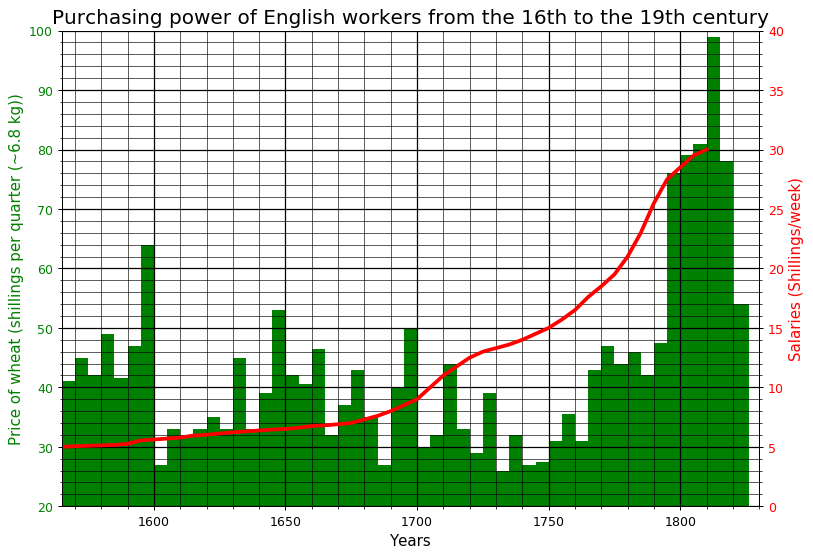

In [6]:
# initiate figure
plt.figure(num=None, figsize=(10, 7), dpi=90, facecolor='w', edgecolor='k')
ax1 = plt.subplot()

# bar graph
ax1.bar(data.Year, data.Wheat, width = 5, bottom = 0, color = colors[2], align = 'edge')

# set y axis params
ax1.set_ylim([20, 100])
ax1.minorticks_on()
ax1.tick_params(axis = 'y', direction = 'out', labelcolor = colors[2], color = 'k')
ax1.set_ylabel("Price of wheat (shillings per quarter (~6.8 kg))", fontsize = 12, color = colors[2])

# add twin axis for line graph
ax2 = ax1.twinx()

# line graph
ax2.plot(data.Year, data.Wages, linewidth = 3, color = colors[0])
# ax2.fill_between(data.Year, data.Wages, 0, color = colors[1])

# add y axis params
ax2.minorticks_on()
ax2.set_ylim([0, 40])
ax2.tick_params(axis = 'y', direction = 'out', labelcolor = colors[0], color = 'k')
ax2.set_ylabel("Salaries (Shillings/week)", fontsize = 12, color = colors[0])

# set x axis params
start = data.Year.iloc[0]
end = 1830
# ax2.tick_params(axis = 'x', labelcolor = colors[1], color = colors[1]) # see question below
ax1.set_xlim([start, end])
ax1.set_xlabel('Years', fontsize = 12)

# add grid
ax1.grid(which = 'major', axis = 'both', color = 'k', linewidth = 1)
ax1.grid(which = 'minor', axis = 'both', color = 'k', linewidth = 0.5)
# ax2.grid(which = 'major', axis = 'both', color = 'k', linewidth = 1) # this works only for the y grid > WHY?
# ax2.grid(which = 'minor', axis = 'both', color = 'k', linewidth = 0.5) # same here > WHY?

# add title
plt.title("Purchasing power of English workers from the 16th to the 19th century", fontsize = 16)

# show the plot
plt.show()

## A new representation
Playfair's goal was to show that the workers' purchasing power had increased over time. To show this better, we can plot this purchasing power, defined as the quantity of wheat a worker can buy with a weekly salary, as a function of time.
<br> <br>
To this end we add an additional column, purchasing power or 'pp', to our dataset, with the quantity (in kg) of wheat a worker can buy with a weekly salary, so $pp (kg) = (Wages/Wheat-price) * 6.8$.

In [7]:
data['pp'] = (data.Wages/data.Wheat) * 6.8

print(data.head(5), '\n...\n', data.tail(5))

   Year  Wheat  Wages        pp
1  1565   41.0   5.00  0.829268
2  1570   45.0   5.05  0.763111
3  1575   42.0   5.08  0.822476
4  1580   49.0   5.12  0.710531
5  1585   41.5   5.15  0.843855 
...
     Year  Wheat  Wages        pp
49  1805   81.0   29.5  2.476543
50  1810   99.0   30.0  2.060606
51  1815   78.0    NaN       NaN
52  1820   54.0    NaN       NaN
53  1821   54.0    NaN       NaN


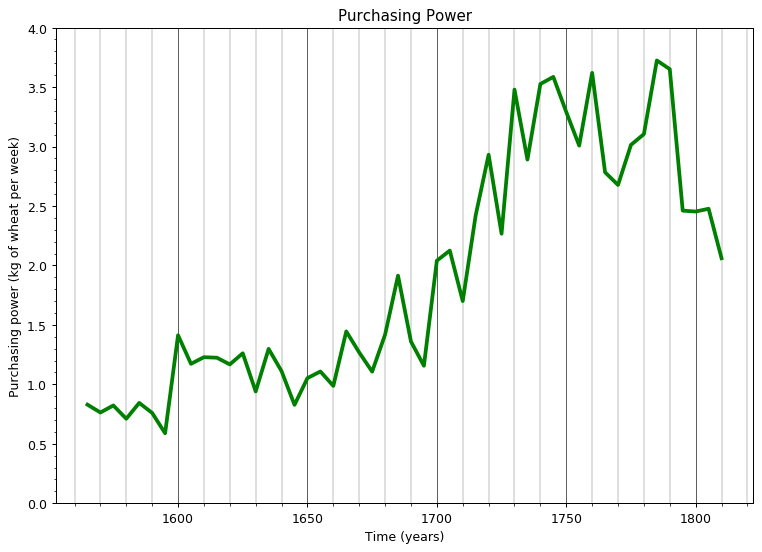

In [8]:
# initiate figure
plt.figure(num=None, figsize=(10, 7), dpi=90, facecolor='w', edgecolor='k')

# line plot
plt.plot(data.Year, data.pp, linewidth = 3, color = 'g')
#plt.bar(data.Year, data.pp, width = 5, color = 'g', align = 'edge')
plt.ylim([0, round(max(data.pp))])
plt.ylabel('Purchasing power (kg of wheat per week)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.title('Purchasing Power')

# add grid line
plt.minorticks_on()
plt.grid(which = 'major', axis = 'x', color = 'k', linewidth = 0.5)
plt.grid(which = 'minor', axis = 'x', color = 'k', linewidth = 0.2)

#show figure
plt.show()

Now we can display ...blabla

This data is available on wikipedia, under [List of English monarchs](https://en.wikipedia.org/wiki/List_of_English_monarchs#Timeline_of_English_monarchs) and [List of British monarchs](https://en.wikipedia.org/wiki/List_of_British_monarchs)  

In [9]:
data_monarchs = pd.read_csv('monarchs.txt', sep=",", header=0)
print(data_monarchs)

    From  Till           Monarch
0   1553  1558            Mary I
1   1554  1558            Philip
2   1558  1603       Elizabeth I
3   1603  1625           James I
4   1625  1653         Charles I
5   1653  1658   Oliver Cromwell
6   1658  1660  Richard Cromwell
7   1660  1685        Charles II
8   1685  1689          James II
9   1689  1702       William III
10  1689  1694           Mary II
11  1707  1714              Anne
12  1714  1727          George I
13  1727  1760         George II
14  1760  1820        George III
15  1820  1830         George IV


Now lets add this data to our data variable

In [10]:
# add column to the data for the monarch
data['Monarch'] = 'no ruler' 
data['Color'] = 'firebrick'

colors = ['firebrick', 'red', 'coral', 'gold', 'olive', 'chartreuse', 'aquamarine', 'g', 'c', 'dodgerblue', 'navy', 'darkviolet', 'fuchsia', 'deeppink', 'crimson', 'pink']

# loop through the data
for i in range(len(data.Year) - 1):
    year = data.Year.iloc[i]
    
    # loop through the monarchs
    for j in range(len(data_monarchs) - 1):
        # define their reign area
        start = data_monarchs.From.iloc[j]
        end = data_monarchs.Till.iloc[j]
        
        # if the year in the dataset falls within their reign, add their name to the correct dataslot
        if (start <= year) & (end > year):
            data.at[i, 'Monarch'] = data_monarchs.Monarch.iloc[j]    
            
            # add coloring
            data.at[i, 'Color'] = colors[j]
                       
print(data.head(15))    

      Year  Wheat  Wages        pp      Monarch  Color
1   1565.0   41.0   5.00  0.829268  Elizabeth I  coral
2   1570.0   45.0   5.05  0.763111  Elizabeth I  coral
3   1575.0   42.0   5.08  0.822476  Elizabeth I  coral
4   1580.0   49.0   5.12  0.710531  Elizabeth I  coral
5   1585.0   41.5   5.15  0.843855  Elizabeth I  coral
6   1590.0   47.0   5.25  0.759574  Elizabeth I  coral
7   1595.0   64.0   5.54  0.588625  Elizabeth I  coral
8   1600.0   27.0   5.61  1.412889      James I   gold
9   1605.0   33.0   5.69  1.172485      James I   gold
10  1610.0   32.0   5.78  1.228250      James I   gold
11  1615.0   33.0   5.94  1.224000      James I   gold
12  1620.0   35.0   6.01  1.167657    Charles I  olive
13  1625.0   33.0   6.12  1.261091    Charles I  olive
14  1630.0   45.0   6.22  0.939911    Charles I  olive
15  1635.0   33.0   6.30  1.298182    Charles I  olive


Now instead of using years as time variable, we will use the ruling monarch. But first, it is better to delete any NaN variables. 

In [11]:
nulldata = pd.isnull(data)
data_raw = data

if any(nulldata):  
    data = data_raw.dropna()

print(data.head(5), '\n...\n', data.tail(5))

     Year  Wheat  Wages        pp      Monarch  Color
1  1565.0   41.0   5.00  0.829268  Elizabeth I  coral
2  1570.0   45.0   5.05  0.763111  Elizabeth I  coral
3  1575.0   42.0   5.08  0.822476  Elizabeth I  coral
4  1580.0   49.0   5.12  0.710531  Elizabeth I  coral
5  1585.0   41.5   5.15  0.843855  Elizabeth I  coral 
...
       Year  Wheat  Wages        pp     Monarch    Color
46  1790.0   47.5   25.5  3.650526  George III  crimson
47  1795.0   76.0   27.5  2.460526  George III  crimson
48  1800.0   79.0   28.5  2.453165  George III  crimson
49  1805.0   81.0   29.5  2.476543  George III  crimson
50  1810.0   99.0   30.0  2.060606  George III  crimson


We change the data so that it is easier to group by Monarch

In [12]:
# data_new = data
# data.set_index('Year', inplace=True)
data['Date'] = data['Year']
data.set_index('Date', inplace=True)

print(data.head(10))

          Year  Wheat  Wages        pp      Monarch  Color
Date                                                      
1565.0  1565.0   41.0   5.00  0.829268  Elizabeth I  coral
1570.0  1570.0   45.0   5.05  0.763111  Elizabeth I  coral
1575.0  1575.0   42.0   5.08  0.822476  Elizabeth I  coral
1580.0  1580.0   49.0   5.12  0.710531  Elizabeth I  coral
1585.0  1585.0   41.5   5.15  0.843855  Elizabeth I  coral
1590.0  1590.0   47.0   5.25  0.759574  Elizabeth I  coral
1595.0  1595.0   64.0   5.54  0.588625  Elizabeth I  coral
1600.0  1600.0   27.0   5.61  1.412889      James I   gold
1605.0  1605.0   33.0   5.69  1.172485      James I   gold
1610.0  1610.0   32.0   5.78  1.228250      James I   gold


C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now let's make the figure.

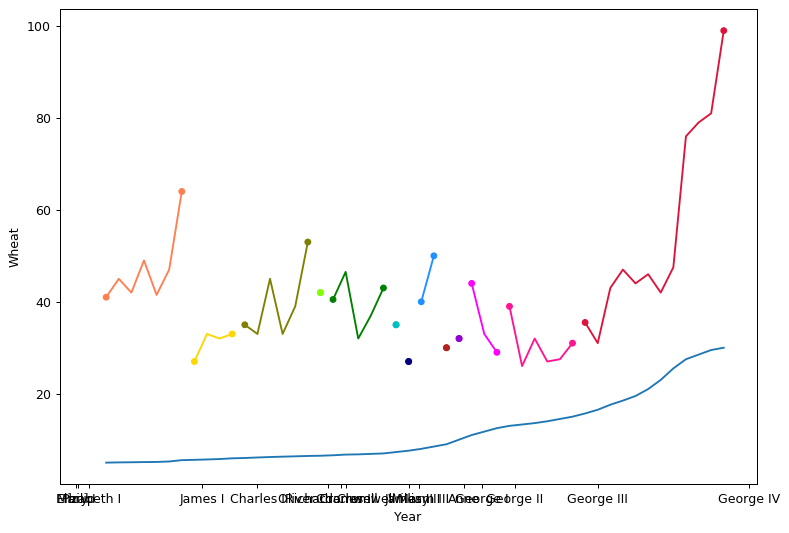

In [13]:
import numpy as np
import matplotlib.cm as cm
from cycler import cycler

# initiate figure
plt.figure(num=None, figsize=(10, 7), dpi=90, facecolor='w', edgecolor='k')
ax1 = plt.subplot()

# xlab
xlabels = np.array(data_monarchs.Monarch)
plt.xticks(data_monarchs.From, data_monarchs.Monarch, rotation=45) # ROTATION DOES NOT WORK

# scatter plots
data_grouped_min = data.groupby('Monarch').first()
data_grouped_min.plot.scatter(x = 'Year',y = 'Wheat', ax=ax1, color = data_grouped_min['Color'])

data_grouped_max = data.groupby('Monarch').last()
data_grouped_max.plot.scatter(x = 'Year',y = 'Wheat', ax=ax1, color = data_grouped_max['Color'])

# adding the grouped line plots
data_grouped_tot = data.groupby(['Monarch'])
for key, group in data_grouped_tot:
    ax1.plot(group['Year'], group['Wheat'], label=key, color=group['Color'].iloc[0])
# data_grouped_tot.plot(legend = False, ax=ax1, color = colors)
# ax1.legend()

# Plot wages
plt.plot(data.Year, data.Wages)

plt.show()

# 